In [5]:
train_data_dir = '/kaggle/input/tomatoleaf/tomato/train'
test_data_dir = '/kaggle/input/tomatoleaf/tomato/val'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [7]:

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [8]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [9]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [10]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 1000 images belonging to 10 classes.


In [11]:

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,914 (671.54 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [14]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [17]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    # steps_per_epoch = 7000//32,
                    epochs = 10,
                    # validation_steps = 3000//32,
                    validation_data = val_gen)  

Epoch 1/10
132/219 ━━━━━━━━━━━━━━━━━━━━ 41s 476ms/step - accuracy: 0.1900 - loss: 2.2153

2024-04-04 08:32:48.570481: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50793: 5.00665, expected 4.36863
2024-04-04 08:32:48.570580: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 51207: 4.96433, expected 4.32631
2024-04-04 08:32:48.570599: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 52287: 5.35377, expected 4.71575
2024-04-04 08:32:48.570608: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 52293: 5.12431, expected 4.48629
2024-04-04 08:32:48.570624: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53572: 5.29457, expected 4.65655
2024-04-04 08:32:48.570635: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 53970: 5.25555, expected 4.61753
2024-04-04 08:32:48.570654: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 56000: 5.37157, expected 4.73355
2024-04-04 08:32:48.570669:

219/219 ━━━━━━━━━━━━━━━━━━━━ 160s 714ms/step - accuracy: 0.2089 - loss: 2.1658 - val_accuracy: 0.3623 - val_loss: 1.8411
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 126s 562ms/step - accuracy: 0.3784 - loss: 1.7186 - val_accuracy: 0.5170 - val_loss: 1.4198
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 127s 567ms/step - accuracy: 0.5388 - loss: 1.3400 - val_accuracy: 0.5710 - val_loss: 1.2242
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 125s 558ms/step - accuracy: 0.5822 - loss: 1.1943 - val_accuracy: 0.6037 - val_loss: 1.1642
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 126s 565ms/step - accuracy: 0.6444 - loss: 1.0492 - val_accuracy: 0.6547 - val_loss: 1.0009
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 131s 584ms/step - accuracy: 0.6545 - loss: 0.9843 - val_accuracy: 0.6233 - val_loss: 1.0530
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 128s 568ms/step - accuracy: 0.6671 - loss: 0.9312 - val_accuracy: 0.6807 - val_loss: 0.9174
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 135s 606ms/step - accuracy: 0.6812 - loss: 0.90

In [18]:
scores = cnn.evaluate(test_gen)


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.7249 - loss: 0.8140

2024-04-04 08:55:20.146189: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.188, expected 7.24213
2024-04-04 08:55:20.146259: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.3942, expected 7.44833
2024-04-04 08:55:20.146275: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.80257, expected 6.8567
2024-04-04 08:55:20.146288: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.65586, expected 5.70999
2024-04-04 08:55:20.146299: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.4636, expected 5.51773
2024-04-04 08:55:20.146308: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.67221, expected 6.72634
2024-04-04 08:55:20.146318: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.85291, expected 5.90703
2024-04-04 08:55:20.146329: E external/local_xla/xla/service

32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 585ms/step - accuracy: 0.7255 - loss: 0.8147


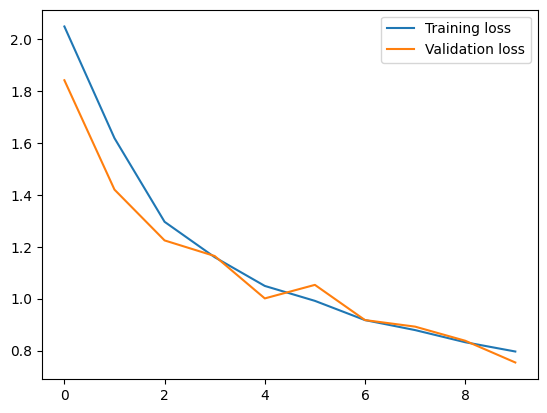

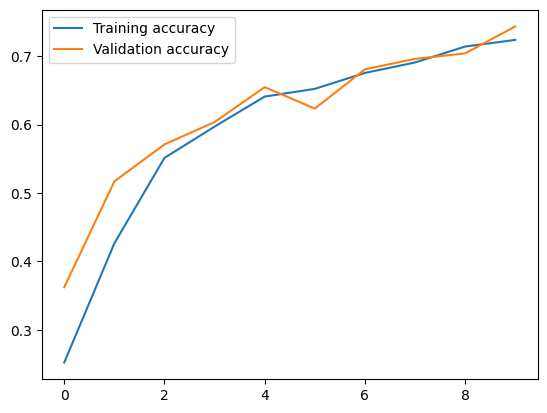

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [20]:
cnn.save('cnn.h5')


In [21]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

/tmp/ipykernel_34/2245222372.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [22]:
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 484ms/step


In [25]:
predictions[1]

array([0.58076507, 0.26001042, 0.04449001, 0.02026469, 0.02973291,
       0.01203834, 0.02265329, 0.02760115, 0.00179234, 0.00065164],
      dtype=float32)

In [26]:
predicted_classes = np.argmax(predictions,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 7, 1, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 4, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 4, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 6, 1, 2, 2, 1, 1, 1, 1, 1, 7, 4, 4, 1, 0, 1, 7, 1, 1, 1,
       1, 1, 1, 4, 2, 1, 1, 1, 3, 1, 1, 7, 4, 1, 1, 1, 1, 0, 1, 1, 4, 0,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 6, 1, 1, 1, 1, 5,
       4, 2, 0, 1, 7, 4, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 9,
       2, 1, 1, 1, 2, 2, 2, 7, 2, 1, 2, 1, 4, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 2, 7, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       5, 2, 4, 2, 2, 2, 2, 1, 1, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 7, 2, 7,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 3,

In [27]:
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [28]:
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[83  7  4  0  3  0  0  3  0  0]
 [ 7 61 12  1 10  1  3  4  0  1]
 [ 1 19 66  2  6  2  0  4  0  0]
 [ 1  9  7 62 13  1  1  5  1  0]
 [ 3  9  9  7 60  4  3  2  3  0]
 [ 1  4  2  1  5 76  4  1  6  0]
 [ 3 12  0  0  8 11 57  0  3  6]
 [ 2  1  1  0  1  2  0 93  0  0]
 [ 0  2  0  4  2  3  0  1 88  0]
 [ 0  0  2  0  8  0  7  0  2 81]]


In [29]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.82      0.83      0.83       100
                        Tomato___Early_blight       0.49      0.61      0.54       100
                         Tomato___Late_blight       0.64      0.66      0.65       100
                           Tomato___Leaf_Mold       0.81      0.62      0.70       100
                  Tomato___Septoria_leaf_spot       0.52      0.60      0.56       100
Tomato___Spider_mites Two-spotted_spider_mite       0.76      0.76      0.76       100
                         Tomato___Target_Spot       0.76      0.57      0.65       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.82      0.93      0.87       100
                 Tomato___Tomato_mosaic_virus       0.85      0.88      0.87       100
                             Tomato___healthy       0.92      0.81      0.86       100

                                     accu